In [51]:
# 이진분류.. 영화리뷰

In [52]:
from tensorflow.keras.datasets import imdb

In [53]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=1000)

In [54]:
# 리뷰를 텍스트로 디코딩

In [55]:
import tensorflow as tf

In [56]:
word_index = imdb.get_word_index()

In [57]:
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]    
)

In [58]:
decoded_review = " ".join(
    reverse_word_index.get(i-3,"?") for i in x_train[0]
)

In [59]:
# 데이터 준비
# 숫자를 멀티 - 핫 인코딩
import numpy as np
from tensorflow.keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=1000)
def vectorize_sequences(sequences,dimension = 1000):
    results = np.zeros((len(sequences),dimension ))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)    

In [60]:
temp = [
    [1,2],
    [3,4]
]
temp = np.array(temp)
temp.shape

(2, 2)

In [61]:
vectorize_sequences(temp,5)

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.]])

In [65]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32') 

In [66]:
# 신경망 모델

In [67]:
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [69]:
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [71]:
#훈련데이터를 학습용 과 검증용
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train,random_state=32)

In [74]:
x_tr.shape, x_val.shape

((18750, 1000), (6250, 1000))

In [75]:
# 모델 훈련

In [76]:
hist = model.fit(x_tr,y_tr,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
37/37 [==============================] - 1s 13ms/step - loss: 0.6212 - acc: 0.6913 - val_loss: 0.5090 - val_acc: 0.7906
Epoch 2/20
37/37 [==============================] - 0s 6ms/step - loss: 0.4322 - acc: 0.8259 - val_loss: 0.3735 - val_acc: 0.8426
Epoch 3/20
37/37 [==============================] - 0s 5ms/step - loss: 0.3454 - acc: 0.8564 - val_loss: 0.3369 - val_acc: 0.8566
Epoch 4/20
37/37 [==============================] - 0s 5ms/step - loss: 0.3168 - acc: 0.8695 - val_loss: 0.3337 - val_acc: 0.8579
Epoch 5/20
37/37 [==============================] - 0s 6ms/step - loss: 0.3046 - acc: 0.8763 - val_loss: 0.3302 - val_acc: 0.8600
Epoch 6/20
37/37 [==============================] - 0s 6ms/step - loss: 0.2983 - acc: 0.8777 - val_loss: 0.3307 - val_acc: 0.8587
Epoch 7/20
37/37 [==============================] - 0s 6ms/step - loss: 0.2953 - acc: 0.8796 - val_loss: 0.3330 - val_acc: 0.8587
Epoch 8/20
37/37 [==============================] - 0s 5ms/step - loss: 0.2919 - acc: 0.8

In [77]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

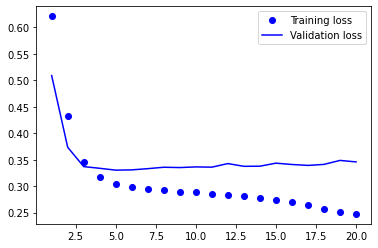

In [78]:
import matplotlib.pyplot as plt
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"bo", label="Training loss")
plt.plot(epochs, val_loss_values,"b", label="Validation loss")
plt.legend()
plt.show()

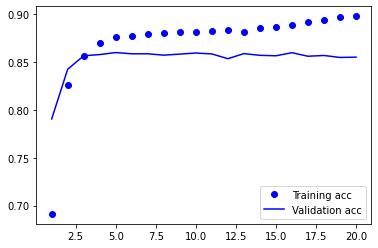

In [79]:
history_dict = hist.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"bo", label="Training acc")
plt.plot(epochs, val_loss_values,"b", label="Validation acc")
plt.legend()
plt.show()

In [80]:
# 예측
model.predict(x_test)

782/782 [==============================] - 1s 951us/step


array([[0.09380347],
       [0.9974527 ],
       [0.6163818 ],
       ...,
       [0.05737863],
       [0.22984079],
       [0.17025265]], dtype=float32)

In [82]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3454 - acc: 0.8530


[0.34541022777557373, 0.8530399799346924]

In [164]:
# 다중분류
from tensorflow.keras.datasets import reuters

In [165]:
(x_train,y_train),(x_test,y_test)= reuters.load_data(num_words=10000)

In [166]:
len(x_train)

8982

In [167]:
x_train = vectorize_sequences(x_train,10000)
x_test = vectorize_sequences(x_test,10000)

In [168]:
# 레이블 인코딩

In [169]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

In [170]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8982, 10000), (2246, 10000), (8982,), (2246,))

In [186]:
# 모델 정의
model = tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(46,activation='softmax')
])

In [187]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [188]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)

In [189]:
hist = model.fit(x_tr,y_tr,epochs=30,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/30
53/53 [==============================] - 2s 19ms/step - loss: 2.9785 - accuracy: 0.2862 - val_loss: 1.8268 - val_accuracy: 0.5454
Epoch 2/30
53/53 [==============================] - 1s 19ms/step - loss: 1.9246 - accuracy: 0.5129 - val_loss: 1.5034 - val_accuracy: 0.6309
Epoch 3/30
53/53 [==============================] - 1s 19ms/step - loss: 1.6002 - accuracy: 0.5984 - val_loss: 1.3450 - val_accuracy: 0.7155
Epoch 4/30
53/53 [==============================] - 1s 21ms/step - loss: 1.3950 - accuracy: 0.6577 - val_loss: 1.2816 - val_accuracy: 0.7173
Epoch 5/30
53/53 [==============================] - 1s 21ms/step - loss: 1.2417 - accuracy: 0.6914 - val_loss: 1.2398 - val_accuracy: 0.7208
Epoch 6/30
53/53 [==============================] - 1s 21ms/step - loss: 1.1351 - accuracy: 0.7132 - val_loss: 1.2406 - val_accuracy: 0.7222
Epoch 7/30
53/53 [==============================] - 1s 19ms/step - loss: 1.0512 - accuracy: 0.7297 - val_loss: 1.2483 - val_accuracy: 0.7337
Epoch 8/30
53

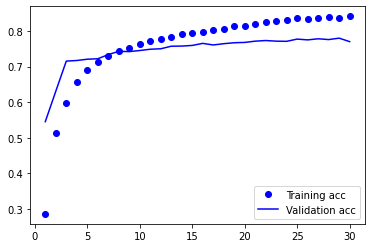

In [190]:
import matplotlib.pyplot as plt
history_dict = hist.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"bo", label="Training acc")
plt.plot(epochs, val_loss_values,"b", label="Validation acc")
plt.legend()
plt.show()

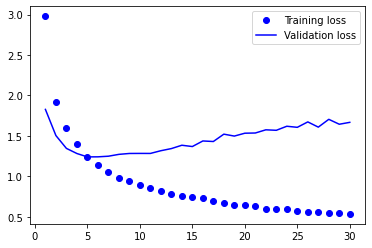

In [191]:

history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"bo", label="Training loss")
plt.plot(epochs, val_loss_values,"b", label="Validation loss")
plt.legend()
plt.show()

In [192]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.7800 - accuracy: 0.7614


[1.7799707651138306, 0.7613534927368164]

In [12]:
# 보스턴 주택 가격
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [13]:
train_data.shape

(404, 13)

In [14]:
# 데이터 정규화
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [15]:
# 모델정의
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam',loss='mse', metrics=['mae'])
    return model

In [16]:
import numpy as np

In [20]:
# k-겹 검증 
k = 4
num_val_samples =  len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[:i*num_val_samples],
            train_data[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[:i*num_val_samples],
            train_targets[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16)
    val_mse, val_mae =  model.evaluate(val_data,val_targets)
    all_scores.append(val_mae)

#0번째 폴드 처리중
Epoch 1/100
19/19 [==============================] - 0s 1ms/step - loss: 540.0945 - mae: 21.3437
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 451.0178 - mae: 18.9912
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 327.1365 - mae: 15.6425
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 182.0516 - mae: 11.1060
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 85.1036 - mae: 7.0963
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 56.4053 - mae: 5.7577
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 41.2602 - mae: 4.8357
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 32.9630 - mae: 4.3059
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 28.7053 - mae: 3.9966
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 25.6643 - mae: 3.7761
Epoch 11/100
19/19 [=========

19/19 [==============================] - 0s 1ms/step - loss: 7.5940 - mae: 1.9507
Epoch 87/100
19/19 [==============================] - 0s 1ms/step - loss: 7.2771 - mae: 1.8838
Epoch 88/100
19/19 [==============================] - 0s 1ms/step - loss: 7.2678 - mae: 1.9021
Epoch 89/100
19/19 [==============================] - 0s 2ms/step - loss: 7.3434 - mae: 1.9320
Epoch 90/100
19/19 [==============================] - 0s 1ms/step - loss: 7.2958 - mae: 1.9091
Epoch 91/100
19/19 [==============================] - 0s 1ms/step - loss: 7.0183 - mae: 1.8570
Epoch 92/100
19/19 [==============================] - 0s 1ms/step - loss: 6.9426 - mae: 1.8428
Epoch 93/100
19/19 [==============================] - 0s 2ms/step - loss: 6.9478 - mae: 1.8429
Epoch 94/100
19/19 [==============================] - 0s 1ms/step - loss: 6.7720 - mae: 1.8354
Epoch 95/100
19/19 [==============================] - 0s 1ms/step - loss: 6.8353 - mae: 1.8314
Epoch 96/100
19/19 [==============================] - 0s 2ms/st

19/19 [==============================] - 0s 2ms/step - loss: 7.0064 - mae: 1.8520
Epoch 72/100
19/19 [==============================] - 0s 2ms/step - loss: 7.0008 - mae: 1.8771
Epoch 73/100
19/19 [==============================] - 0s 1ms/step - loss: 7.0711 - mae: 1.8327
Epoch 74/100
19/19 [==============================] - 0s 1ms/step - loss: 6.9157 - mae: 1.8477
Epoch 75/100
19/19 [==============================] - 0s 2ms/step - loss: 6.7769 - mae: 1.8233
Epoch 76/100
19/19 [==============================] - 0s 2ms/step - loss: 6.9219 - mae: 1.8322
Epoch 77/100
19/19 [==============================] - 0s 2ms/step - loss: 6.7733 - mae: 1.8243
Epoch 78/100
19/19 [==============================] - 0s 942us/step - loss: 6.8471 - mae: 1.8195
Epoch 79/100
19/19 [==============================] - 0s 1ms/step - loss: 7.1462 - mae: 1.8793
Epoch 80/100
19/19 [==============================] - 0s 1ms/step - loss: 6.7634 - mae: 1.8467
Epoch 81/100
19/19 [==============================] - 0s 2ms/

19/19 [==============================] - 0s 1ms/step - loss: 7.2025 - mae: 1.9757
Epoch 57/100
19/19 [==============================] - 0s 1ms/step - loss: 7.1605 - mae: 1.9649
Epoch 58/100
19/19 [==============================] - 0s 1ms/step - loss: 7.0749 - mae: 1.9814
Epoch 59/100
19/19 [==============================] - 0s 1ms/step - loss: 7.0463 - mae: 1.9499
Epoch 60/100
19/19 [==============================] - 0s 2ms/step - loss: 6.9805 - mae: 1.9470
Epoch 61/100
19/19 [==============================] - 0s 2ms/step - loss: 6.8845 - mae: 1.9389
Epoch 62/100
19/19 [==============================] - 0s 1ms/step - loss: 6.8169 - mae: 1.9320
Epoch 63/100
19/19 [==============================] - 0s 1ms/step - loss: 6.7285 - mae: 1.9179
Epoch 64/100
19/19 [==============================] - 0s 1ms/step - loss: 6.8325 - mae: 1.8997
Epoch 65/100
19/19 [==============================] - 0s 2ms/step - loss: 6.8043 - mae: 1.9635
Epoch 66/100
19/19 [==============================] - 0s 2ms/st

Epoch 41/100
19/19 [==============================] - 0s 2ms/step - loss: 9.5883 - mae: 2.1580
Epoch 42/100
19/19 [==============================] - 0s 1ms/step - loss: 9.4700 - mae: 2.1534
Epoch 43/100
19/19 [==============================] - 0s 1ms/step - loss: 9.2816 - mae: 2.1451
Epoch 44/100
19/19 [==============================] - 0s 1ms/step - loss: 9.2537 - mae: 2.1085
Epoch 45/100
19/19 [==============================] - 0s 1ms/step - loss: 9.0660 - mae: 2.1081
Epoch 46/100
19/19 [==============================] - 0s 1ms/step - loss: 9.0319 - mae: 2.1283
Epoch 47/100
19/19 [==============================] - 0s 1ms/step - loss: 8.9038 - mae: 2.0926
Epoch 48/100
19/19 [==============================] - 0s 3ms/step - loss: 8.7915 - mae: 2.0874
Epoch 49/100
19/19 [==============================] - 0s 1ms/step - loss: 8.8353 - mae: 2.1008
Epoch 50/100
19/19 [==============================] - 0s 1ms/step - loss: 8.7684 - mae: 2.0623
Epoch 51/100
19/19 [==============================

In [21]:
all_scores

[1.9551092386245728, 2.43221116065979, 2.45088529586792, 2.320039749145508]

In [23]:
np.mean(all_scores)

2.2895613610744476

In [24]:
# k-겹 검증 
k = 4
num_val_samples =  len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[:i*num_val_samples],
            train_data[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[:i*num_val_samples],
            train_targets[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16,
                        validation_data=(val_data,val_targets) )
    val_mse, val_mae =  model.evaluate(val_data,val_targets)
    all_mae_histories.append(history.history['val_mae'])

#0번째 폴드 처리중
Epoch 1/500
19/19 [==============================] - 0s 8ms/step - loss: 571.1146 - mae: 22.1391 - val_loss: 517.5233 - val_mae: 20.5642
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 495.5164 - mae: 20.3936 - val_loss: 425.4249 - val_mae: 18.3164
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 378.5480 - mae: 17.4401 - val_loss: 275.4461 - val_mae: 14.2126
Epoch 4/500
19/19 [==============================] - 0s 3ms/step - loss: 214.9661 - mae: 12.3692 - val_loss: 113.2792 - val_mae: 8.2973
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 91.7101 - mae: 7.2679 - val_loss: 50.7233 - val_mae: 5.0274
Epoch 6/500
19/19 [==============================] - 0s 3ms/step - loss: 51.7621 - mae: 5.5235 - val_loss: 37.8312 - val_mae: 4.2504
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 36.8251 - mae: 4.5679 - val_loss: 29.5736 - val_mae: 3.6053
Epoch 8/500
19/19 [=======================

19/19 [==============================] - 0s 3ms/step - loss: 8.6358 - mae: 2.1019 - val_loss: 7.5386 - val_mae: 2.0176
Epoch 63/500
19/19 [==============================] - 0s 3ms/step - loss: 8.5152 - mae: 2.0889 - val_loss: 7.4933 - val_mae: 2.0039
Epoch 64/500
19/19 [==============================] - 0s 4ms/step - loss: 8.6202 - mae: 2.1252 - val_loss: 7.4787 - val_mae: 2.0048
Epoch 65/500
19/19 [==============================] - 0s 3ms/step - loss: 8.5281 - mae: 2.0809 - val_loss: 7.5382 - val_mae: 2.0383
Epoch 66/500
19/19 [==============================] - 0s 3ms/step - loss: 8.4838 - mae: 2.0840 - val_loss: 7.4757 - val_mae: 2.0026
Epoch 67/500
19/19 [==============================] - 0s 4ms/step - loss: 8.3579 - mae: 2.0568 - val_loss: 7.4197 - val_mae: 2.0017
Epoch 68/500
19/19 [==============================] - 0s 4ms/step - loss: 8.6041 - mae: 2.1232 - val_loss: 7.6133 - val_mae: 2.0277
Epoch 69/500
19/19 [==============================] - 0s 3ms/step - loss: 8.1930 - mae: 2

Epoch 124/500
19/19 [==============================] - 0s 3ms/step - loss: 5.4421 - mae: 1.6512 - val_loss: 7.4211 - val_mae: 2.0774
Epoch 125/500
19/19 [==============================] - 0s 3ms/step - loss: 5.5438 - mae: 1.6655 - val_loss: 7.0443 - val_mae: 1.9190
Epoch 126/500
19/19 [==============================] - 0s 3ms/step - loss: 5.6899 - mae: 1.7103 - val_loss: 7.1034 - val_mae: 1.9561
Epoch 127/500
19/19 [==============================] - 0s 3ms/step - loss: 5.4068 - mae: 1.6378 - val_loss: 7.7356 - val_mae: 2.1408
Epoch 128/500
19/19 [==============================] - 0s 4ms/step - loss: 5.4900 - mae: 1.6500 - val_loss: 6.8947 - val_mae: 1.9603
Epoch 129/500
19/19 [==============================] - 0s 3ms/step - loss: 5.3764 - mae: 1.6360 - val_loss: 7.3703 - val_mae: 2.0348
Epoch 130/500
19/19 [==============================] - 0s 3ms/step - loss: 5.3300 - mae: 1.6525 - val_loss: 7.1271 - val_mae: 2.0273
Epoch 131/500
19/19 [==============================] - 0s 3ms/step - 

19/19 [==============================] - 0s 4ms/step - loss: 3.5729 - mae: 1.3412 - val_loss: 8.0527 - val_mae: 2.1361
Epoch 186/500
19/19 [==============================] - 0s 4ms/step - loss: 3.7147 - mae: 1.4008 - val_loss: 8.0769 - val_mae: 2.1229
Epoch 187/500
19/19 [==============================] - 0s 4ms/step - loss: 3.6539 - mae: 1.3702 - val_loss: 8.5666 - val_mae: 2.1893
Epoch 188/500
19/19 [==============================] - 0s 3ms/step - loss: 3.7102 - mae: 1.3979 - val_loss: 8.2881 - val_mae: 2.1309
Epoch 189/500
19/19 [==============================] - 0s 3ms/step - loss: 3.4412 - mae: 1.3283 - val_loss: 8.1491 - val_mae: 2.1123
Epoch 190/500
19/19 [==============================] - 0s 4ms/step - loss: 3.6188 - mae: 1.3557 - val_loss: 8.2531 - val_mae: 2.1632
Epoch 191/500
19/19 [==============================] - 0s 3ms/step - loss: 3.5843 - mae: 1.3765 - val_loss: 8.5602 - val_mae: 2.1454
Epoch 192/500
19/19 [==============================] - 0s 3ms/step - loss: 3.6474 -

Epoch 247/500
19/19 [==============================] - 0s 4ms/step - loss: 2.5586 - mae: 1.1544 - val_loss: 9.6058 - val_mae: 2.2938
Epoch 248/500
19/19 [==============================] - 0s 3ms/step - loss: 2.4252 - mae: 1.1152 - val_loss: 9.6520 - val_mae: 2.2092
Epoch 249/500
19/19 [==============================] - 0s 4ms/step - loss: 2.3756 - mae: 1.1217 - val_loss: 9.5262 - val_mae: 2.2023
Epoch 250/500
19/19 [==============================] - 0s 4ms/step - loss: 2.3483 - mae: 1.1051 - val_loss: 9.4244 - val_mae: 2.2125
Epoch 251/500
19/19 [==============================] - 0s 3ms/step - loss: 2.3173 - mae: 1.1029 - val_loss: 9.3127 - val_mae: 2.2144
Epoch 252/500
19/19 [==============================] - 0s 3ms/step - loss: 2.4467 - mae: 1.1364 - val_loss: 9.6384 - val_mae: 2.2494
Epoch 253/500
19/19 [==============================] - 0s 3ms/step - loss: 2.5469 - mae: 1.1522 - val_loss: 10.2542 - val_mae: 2.2911
Epoch 254/500
19/19 [==============================] - 0s 3ms/step -

19/19 [==============================] - 0s 4ms/step - loss: 1.7850 - mae: 0.9505 - val_loss: 10.8156 - val_mae: 2.2635
Epoch 309/500
19/19 [==============================] - 0s 3ms/step - loss: 1.6321 - mae: 0.9385 - val_loss: 10.6336 - val_mae: 2.3592
Epoch 310/500
19/19 [==============================] - 0s 3ms/step - loss: 1.9778 - mae: 1.0396 - val_loss: 11.1953 - val_mae: 2.3932
Epoch 311/500
19/19 [==============================] - 0s 4ms/step - loss: 1.8927 - mae: 0.9892 - val_loss: 10.5244 - val_mae: 2.2925
Epoch 312/500
19/19 [==============================] - 0s 4ms/step - loss: 1.6655 - mae: 0.9257 - val_loss: 10.7958 - val_mae: 2.3145
Epoch 313/500
19/19 [==============================] - 0s 3ms/step - loss: 1.7126 - mae: 0.9541 - val_loss: 11.0138 - val_mae: 2.3331
Epoch 314/500
19/19 [==============================] - 0s 3ms/step - loss: 1.6845 - mae: 0.9213 - val_loss: 10.6135 - val_mae: 2.2939
Epoch 315/500
19/19 [==============================] - 0s 3ms/step - loss: 1

19/19 [==============================] - 0s 3ms/step - loss: 1.4467 - mae: 0.8804 - val_loss: 11.5871 - val_mae: 2.3557
Epoch 370/500
19/19 [==============================] - 0s 3ms/step - loss: 1.3579 - mae: 0.8253 - val_loss: 11.4124 - val_mae: 2.3450
Epoch 371/500
19/19 [==============================] - 0s 3ms/step - loss: 1.2798 - mae: 0.8042 - val_loss: 11.4658 - val_mae: 2.3163
Epoch 372/500
19/19 [==============================] - 0s 3ms/step - loss: 1.4029 - mae: 0.8428 - val_loss: 11.2737 - val_mae: 2.3429
Epoch 373/500
19/19 [==============================] - 0s 3ms/step - loss: 1.3590 - mae: 0.8269 - val_loss: 11.6226 - val_mae: 2.3448
Epoch 374/500
19/19 [==============================] - 0s 3ms/step - loss: 1.3150 - mae: 0.8356 - val_loss: 11.5253 - val_mae: 2.4450
Epoch 375/500
19/19 [==============================] - 0s 3ms/step - loss: 1.2463 - mae: 0.7846 - val_loss: 11.9052 - val_mae: 2.4770
Epoch 376/500
19/19 [==============================] - 0s 3ms/step - loss: 1

19/19 [==============================] - 0s 3ms/step - loss: 1.2580 - mae: 0.8174 - val_loss: 12.2207 - val_mae: 2.4958
Epoch 431/500
19/19 [==============================] - 0s 3ms/step - loss: 1.1077 - mae: 0.7538 - val_loss: 12.4001 - val_mae: 2.4827
Epoch 432/500
19/19 [==============================] - 0s 3ms/step - loss: 1.0929 - mae: 0.7684 - val_loss: 12.3331 - val_mae: 2.4364
Epoch 433/500
19/19 [==============================] - 0s 3ms/step - loss: 1.0314 - mae: 0.7145 - val_loss: 12.3737 - val_mae: 2.4327
Epoch 434/500
19/19 [==============================] - 0s 3ms/step - loss: 0.9534 - mae: 0.6725 - val_loss: 12.3618 - val_mae: 2.4530
Epoch 435/500
19/19 [==============================] - 0s 3ms/step - loss: 0.9434 - mae: 0.6675 - val_loss: 12.1643 - val_mae: 2.4510
Epoch 436/500
19/19 [==============================] - 0s 3ms/step - loss: 1.0593 - mae: 0.7273 - val_loss: 12.5059 - val_mae: 2.5148
Epoch 437/500
19/19 [==============================] - 0s 3ms/step - loss: 1

19/19 [==============================] - 0s 3ms/step - loss: 0.7600 - mae: 0.6093 - val_loss: 13.3910 - val_mae: 2.5707
Epoch 492/500
19/19 [==============================] - 0s 3ms/step - loss: 0.7703 - mae: 0.6349 - val_loss: 12.7873 - val_mae: 2.5420
Epoch 493/500
19/19 [==============================] - 0s 3ms/step - loss: 0.7651 - mae: 0.6128 - val_loss: 13.1758 - val_mae: 2.5604
Epoch 494/500
19/19 [==============================] - 0s 3ms/step - loss: 0.8054 - mae: 0.6316 - val_loss: 12.5198 - val_mae: 2.4887
Epoch 495/500
19/19 [==============================] - 0s 3ms/step - loss: 0.7562 - mae: 0.6072 - val_loss: 13.0455 - val_mae: 2.5480
Epoch 496/500
19/19 [==============================] - 0s 3ms/step - loss: 0.7368 - mae: 0.5941 - val_loss: 12.5619 - val_mae: 2.4785
Epoch 497/500
19/19 [==============================] - 0s 3ms/step - loss: 0.7393 - mae: 0.6144 - val_loss: 12.7541 - val_mae: 2.4946
Epoch 498/500
19/19 [==============================] - 0s 3ms/step - loss: 0

19/19 [==============================] - 0s 3ms/step - loss: 7.5943 - mae: 1.9407 - val_loss: 10.5961 - val_mae: 2.5350
Epoch 52/500
19/19 [==============================] - 0s 3ms/step - loss: 7.4905 - mae: 1.9442 - val_loss: 10.6950 - val_mae: 2.5509
Epoch 53/500
19/19 [==============================] - 0s 3ms/step - loss: 7.5355 - mae: 1.9383 - val_loss: 10.7118 - val_mae: 2.5483
Epoch 54/500
19/19 [==============================] - 0s 3ms/step - loss: 7.4252 - mae: 1.9425 - val_loss: 10.7003 - val_mae: 2.5565
Epoch 55/500
19/19 [==============================] - 0s 3ms/step - loss: 7.3191 - mae: 1.9127 - val_loss: 10.5360 - val_mae: 2.5295
Epoch 56/500
19/19 [==============================] - 0s 4ms/step - loss: 7.2671 - mae: 1.9177 - val_loss: 10.6131 - val_mae: 2.5481
Epoch 57/500
19/19 [==============================] - 0s 4ms/step - loss: 7.2535 - mae: 1.8965 - val_loss: 10.5210 - val_mae: 2.5231
Epoch 58/500
19/19 [==============================] - 0s 3ms/step - loss: 7.2434 -

Epoch 113/500
19/19 [==============================] - 0s 5ms/step - loss: 4.3883 - mae: 1.5400 - val_loss: 9.1759 - val_mae: 2.3395
Epoch 114/500
19/19 [==============================] - 0s 4ms/step - loss: 4.4259 - mae: 1.5375 - val_loss: 9.0680 - val_mae: 2.3259
Epoch 115/500
19/19 [==============================] - 0s 5ms/step - loss: 4.4928 - mae: 1.5362 - val_loss: 10.1107 - val_mae: 2.4940
Epoch 116/500
19/19 [==============================] - 0s 5ms/step - loss: 4.3968 - mae: 1.5359 - val_loss: 9.0700 - val_mae: 2.3213
Epoch 117/500
19/19 [==============================] - 0s 4ms/step - loss: 4.2862 - mae: 1.5173 - val_loss: 9.4425 - val_mae: 2.3860
Epoch 118/500
19/19 [==============================] - 0s 3ms/step - loss: 4.2836 - mae: 1.4920 - val_loss: 9.5759 - val_mae: 2.4033
Epoch 119/500
19/19 [==============================] - 0s 4ms/step - loss: 4.1704 - mae: 1.4775 - val_loss: 9.0911 - val_mae: 2.3290
Epoch 120/500
19/19 [==============================] - 0s 4ms/step -

19/19 [==============================] - 0s 3ms/step - loss: 2.8397 - mae: 1.2363 - val_loss: 9.5957 - val_mae: 2.3430
Epoch 175/500
19/19 [==============================] - 0s 3ms/step - loss: 2.8919 - mae: 1.2535 - val_loss: 10.0649 - val_mae: 2.4158
Epoch 176/500
19/19 [==============================] - 0s 3ms/step - loss: 2.8294 - mae: 1.2399 - val_loss: 9.3050 - val_mae: 2.3078
Epoch 177/500
19/19 [==============================] - 0s 3ms/step - loss: 2.7639 - mae: 1.2111 - val_loss: 9.9662 - val_mae: 2.4206
Epoch 178/500
19/19 [==============================] - 0s 3ms/step - loss: 2.8915 - mae: 1.2417 - val_loss: 10.6874 - val_mae: 2.5393
Epoch 179/500
19/19 [==============================] - 0s 6ms/step - loss: 2.8758 - mae: 1.2821 - val_loss: 9.1183 - val_mae: 2.2746
Epoch 180/500
19/19 [==============================] - 0s 4ms/step - loss: 2.6838 - mae: 1.1867 - val_loss: 9.4842 - val_mae: 2.3148
Epoch 181/500
19/19 [==============================] - 0s 3ms/step - loss: 2.6762

19/19 [==============================] - 0s 3ms/step - loss: 1.9979 - mae: 1.0165 - val_loss: 10.5141 - val_mae: 2.4193
Epoch 236/500
19/19 [==============================] - 0s 3ms/step - loss: 2.0800 - mae: 1.0476 - val_loss: 10.6542 - val_mae: 2.4036
Epoch 237/500
19/19 [==============================] - 0s 3ms/step - loss: 2.1165 - mae: 1.0452 - val_loss: 11.0960 - val_mae: 2.4566
Epoch 238/500
19/19 [==============================] - 0s 3ms/step - loss: 2.0719 - mae: 1.0615 - val_loss: 12.6451 - val_mae: 2.6835
Epoch 239/500
19/19 [==============================] - 0s 3ms/step - loss: 2.4075 - mae: 1.1751 - val_loss: 12.0680 - val_mae: 2.6683
Epoch 240/500
19/19 [==============================] - 0s 3ms/step - loss: 2.0427 - mae: 1.0326 - val_loss: 10.0093 - val_mae: 2.3676
Epoch 241/500
19/19 [==============================] - 0s 3ms/step - loss: 2.0072 - mae: 1.0407 - val_loss: 10.6641 - val_mae: 2.3916
Epoch 242/500
19/19 [==============================] - 0s 3ms/step - loss: 2

19/19 [==============================] - 0s 4ms/step - loss: 1.5264 - mae: 0.8634 - val_loss: 10.8850 - val_mae: 2.4454
Epoch 297/500
19/19 [==============================] - 0s 3ms/step - loss: 1.4434 - mae: 0.8478 - val_loss: 11.0126 - val_mae: 2.4668
Epoch 298/500
19/19 [==============================] - 0s 3ms/step - loss: 1.5151 - mae: 0.8657 - val_loss: 11.4680 - val_mae: 2.5141
Epoch 299/500
19/19 [==============================] - 0s 3ms/step - loss: 1.7868 - mae: 1.0066 - val_loss: 13.0824 - val_mae: 2.7532
Epoch 300/500
19/19 [==============================] - 0s 3ms/step - loss: 1.8348 - mae: 0.9917 - val_loss: 12.4484 - val_mae: 2.6907
Epoch 301/500
19/19 [==============================] - 0s 2ms/step - loss: 1.7083 - mae: 0.9698 - val_loss: 11.7821 - val_mae: 2.5738
Epoch 302/500
19/19 [==============================] - 0s 3ms/step - loss: 1.6036 - mae: 0.9141 - val_loss: 11.4413 - val_mae: 2.5094
Epoch 303/500
19/19 [==============================] - 0s 4ms/step - loss: 1

19/19 [==============================] - 0s 2ms/step - loss: 1.1756 - mae: 0.7675 - val_loss: 10.8991 - val_mae: 2.4161
Epoch 358/500
19/19 [==============================] - 0s 3ms/step - loss: 1.3891 - mae: 0.8539 - val_loss: 11.1638 - val_mae: 2.4244
Epoch 359/500
19/19 [==============================] - 0s 3ms/step - loss: 1.2304 - mae: 0.7758 - val_loss: 10.8711 - val_mae: 2.3844
Epoch 360/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1511 - mae: 0.7606 - val_loss: 10.8798 - val_mae: 2.3874
Epoch 361/500
19/19 [==============================] - 0s 3ms/step - loss: 1.2370 - mae: 0.8451 - val_loss: 10.5595 - val_mae: 2.3497
Epoch 362/500
19/19 [==============================] - 0s 3ms/step - loss: 1.1505 - mae: 0.7453 - val_loss: 10.6547 - val_mae: 2.3488
Epoch 363/500
19/19 [==============================] - 0s 3ms/step - loss: 1.1288 - mae: 0.7373 - val_loss: 11.6585 - val_mae: 2.5066
Epoch 364/500
19/19 [==============================] - 0s 3ms/step - loss: 1

19/19 [==============================] - 0s 2ms/step - loss: 0.8119 - mae: 0.6146 - val_loss: 11.4578 - val_mae: 2.4138
Epoch 419/500
19/19 [==============================] - 0s 3ms/step - loss: 0.8292 - mae: 0.6255 - val_loss: 11.4439 - val_mae: 2.4211
Epoch 420/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8633 - mae: 0.6376 - val_loss: 13.0967 - val_mae: 2.6454
Epoch 421/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8866 - mae: 0.7085 - val_loss: 12.2674 - val_mae: 2.5454
Epoch 422/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8121 - mae: 0.6184 - val_loss: 11.7321 - val_mae: 2.5062
Epoch 423/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8509 - mae: 0.6441 - val_loss: 11.7959 - val_mae: 2.4566
Epoch 424/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9658 - mae: 0.7205 - val_loss: 11.4619 - val_mae: 2.3943
Epoch 425/500
19/19 [==============================] - 0s 2ms/step - loss: 0

19/19 [==============================] - 0s 2ms/step - loss: 0.6530 - mae: 0.5578 - val_loss: 12.1290 - val_mae: 2.4672
Epoch 480/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5944 - mae: 0.5283 - val_loss: 11.3504 - val_mae: 2.4243
Epoch 481/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6231 - mae: 0.5708 - val_loss: 12.4803 - val_mae: 2.5166
Epoch 482/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6655 - mae: 0.5582 - val_loss: 12.2707 - val_mae: 2.5126
Epoch 483/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6429 - mae: 0.5698 - val_loss: 12.9600 - val_mae: 2.6147
Epoch 484/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6285 - mae: 0.5447 - val_loss: 11.1904 - val_mae: 2.3990
Epoch 485/500
19/19 [==============================] - 0s 3ms/step - loss: 0.7113 - mae: 0.5852 - val_loss: 12.7290 - val_mae: 2.5449
Epoch 486/500
19/19 [==============================] - 0s 2ms/step - loss: 0

19/19 [==============================] - 0s 2ms/step - loss: 8.7624 - mae: 2.1839 - val_loss: 14.6647 - val_mae: 2.6366
Epoch 40/500
19/19 [==============================] - 0s 2ms/step - loss: 8.5134 - mae: 2.1816 - val_loss: 14.6230 - val_mae: 2.6297
Epoch 41/500
19/19 [==============================] - 0s 2ms/step - loss: 8.3146 - mae: 2.1383 - val_loss: 14.4452 - val_mae: 2.6137
Epoch 42/500
19/19 [==============================] - 0s 2ms/step - loss: 8.1793 - mae: 2.1228 - val_loss: 14.5764 - val_mae: 2.6185
Epoch 43/500
19/19 [==============================] - 0s 2ms/step - loss: 8.0963 - mae: 2.1014 - val_loss: 14.5813 - val_mae: 2.6044
Epoch 44/500
19/19 [==============================] - 0s 2ms/step - loss: 8.1072 - mae: 2.0976 - val_loss: 14.4007 - val_mae: 2.6007
Epoch 45/500
19/19 [==============================] - 0s 3ms/step - loss: 7.9533 - mae: 2.0973 - val_loss: 14.2071 - val_mae: 2.6112
Epoch 46/500
19/19 [==============================] - 0s 2ms/step - loss: 7.8756 -

Epoch 101/500
19/19 [==============================] - 0s 2ms/step - loss: 5.0041 - mae: 1.6924 - val_loss: 13.1932 - val_mae: 2.5393
Epoch 102/500
19/19 [==============================] - 0s 2ms/step - loss: 4.9073 - mae: 1.6595 - val_loss: 13.0247 - val_mae: 2.5099
Epoch 103/500
19/19 [==============================] - 0s 2ms/step - loss: 4.8692 - mae: 1.6574 - val_loss: 13.0745 - val_mae: 2.5020
Epoch 104/500
19/19 [==============================] - 0s 2ms/step - loss: 4.8830 - mae: 1.6296 - val_loss: 13.2943 - val_mae: 2.5306
Epoch 105/500
19/19 [==============================] - 0s 2ms/step - loss: 4.8850 - mae: 1.6542 - val_loss: 13.3120 - val_mae: 2.5555
Epoch 106/500
19/19 [==============================] - 0s 3ms/step - loss: 4.8344 - mae: 1.6260 - val_loss: 13.0743 - val_mae: 2.5412
Epoch 107/500
19/19 [==============================] - 0s 2ms/step - loss: 4.7134 - mae: 1.6269 - val_loss: 12.9424 - val_mae: 2.4872
Epoch 108/500
19/19 [==============================] - 0s 2ms/

19/19 [==============================] - 0s 2ms/step - loss: 3.4679 - mae: 1.3726 - val_loss: 13.1403 - val_mae: 2.5359
Epoch 163/500
19/19 [==============================] - 0s 2ms/step - loss: 3.3939 - mae: 1.3717 - val_loss: 13.3246 - val_mae: 2.5951
Epoch 164/500
19/19 [==============================] - 0s 2ms/step - loss: 3.4397 - mae: 1.3946 - val_loss: 13.4287 - val_mae: 2.5656
Epoch 165/500
19/19 [==============================] - 0s 3ms/step - loss: 3.3542 - mae: 1.3712 - val_loss: 13.4697 - val_mae: 2.5749
Epoch 166/500
19/19 [==============================] - 0s 2ms/step - loss: 3.3723 - mae: 1.3648 - val_loss: 13.1825 - val_mae: 2.5383
Epoch 167/500
19/19 [==============================] - 0s 2ms/step - loss: 3.2649 - mae: 1.3524 - val_loss: 13.2258 - val_mae: 2.5276
Epoch 168/500
19/19 [==============================] - 0s 3ms/step - loss: 3.4346 - mae: 1.3646 - val_loss: 13.7321 - val_mae: 2.5906
Epoch 169/500
19/19 [==============================] - 0s 2ms/step - loss: 3

19/19 [==============================] - 0s 2ms/step - loss: 2.3640 - mae: 1.1415 - val_loss: 13.3571 - val_mae: 2.5846
Epoch 224/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1283 - mae: 1.0870 - val_loss: 13.7476 - val_mae: 2.6321
Epoch 225/500
19/19 [==============================] - 0s 3ms/step - loss: 2.1729 - mae: 1.0846 - val_loss: 13.3232 - val_mae: 2.5580
Epoch 226/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1043 - mae: 1.0965 - val_loss: 13.7789 - val_mae: 2.6197
Epoch 227/500
19/19 [==============================] - 0s 3ms/step - loss: 2.0669 - mae: 1.0600 - val_loss: 13.4601 - val_mae: 2.5767
Epoch 228/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0346 - mae: 1.0581 - val_loss: 13.9573 - val_mae: 2.6431
Epoch 229/500
19/19 [==============================] - 0s 3ms/step - loss: 2.1932 - mae: 1.1167 - val_loss: 13.2865 - val_mae: 2.5565
Epoch 230/500
19/19 [==============================] - 0s 3ms/step - loss: 2

19/19 [==============================] - 0s 2ms/step - loss: 1.3767 - mae: 0.8907 - val_loss: 14.2431 - val_mae: 2.7187
Epoch 285/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4305 - mae: 0.9194 - val_loss: 14.1428 - val_mae: 2.7113
Epoch 286/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3489 - mae: 0.8607 - val_loss: 13.7027 - val_mae: 2.6575
Epoch 287/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3627 - mae: 0.8640 - val_loss: 13.7642 - val_mae: 2.6675
Epoch 288/500
19/19 [==============================] - 0s 3ms/step - loss: 1.3947 - mae: 0.8788 - val_loss: 13.8864 - val_mae: 2.6532
Epoch 289/500
19/19 [==============================] - 0s 2ms/step - loss: 1.2704 - mae: 0.8477 - val_loss: 13.8470 - val_mae: 2.6964
Epoch 290/500
19/19 [==============================] - 0s 3ms/step - loss: 1.3011 - mae: 0.8536 - val_loss: 14.4821 - val_mae: 2.7278
Epoch 291/500
19/19 [==============================] - 0s 4ms/step - loss: 1

19/19 [==============================] - 0s 3ms/step - loss: 0.8521 - mae: 0.6917 - val_loss: 13.8594 - val_mae: 2.6763
Epoch 346/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8865 - mae: 0.7012 - val_loss: 13.4487 - val_mae: 2.6272
Epoch 347/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8028 - mae: 0.6571 - val_loss: 14.0439 - val_mae: 2.7147
Epoch 348/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8821 - mae: 0.7146 - val_loss: 13.7482 - val_mae: 2.6575
Epoch 349/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8396 - mae: 0.6863 - val_loss: 13.6245 - val_mae: 2.6570
Epoch 350/500
19/19 [==============================] - 0s 3ms/step - loss: 0.8428 - mae: 0.6993 - val_loss: 13.7324 - val_mae: 2.6633
Epoch 351/500
19/19 [==============================] - 0s 4ms/step - loss: 0.8025 - mae: 0.6698 - val_loss: 13.6514 - val_mae: 2.6308
Epoch 352/500
19/19 [==============================] - 0s 4ms/step - loss: 0

19/19 [==============================] - 0s 3ms/step - loss: 0.6018 - mae: 0.5711 - val_loss: 13.4262 - val_mae: 2.6339
Epoch 407/500
19/19 [==============================] - 0s 3ms/step - loss: 0.5473 - mae: 0.5476 - val_loss: 13.8767 - val_mae: 2.6789
Epoch 408/500
19/19 [==============================] - 0s 3ms/step - loss: 0.5434 - mae: 0.5443 - val_loss: 13.7996 - val_mae: 2.6738
Epoch 409/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6010 - mae: 0.5717 - val_loss: 13.8368 - val_mae: 2.6779
Epoch 410/500
19/19 [==============================] - 0s 3ms/step - loss: 0.5492 - mae: 0.5392 - val_loss: 13.4038 - val_mae: 2.6351
Epoch 411/500
19/19 [==============================] - 0s 3ms/step - loss: 0.5156 - mae: 0.5362 - val_loss: 13.9634 - val_mae: 2.6925
Epoch 412/500
19/19 [==============================] - 0s 3ms/step - loss: 0.5306 - mae: 0.5236 - val_loss: 13.6859 - val_mae: 2.6665
Epoch 413/500
19/19 [==============================] - 0s 3ms/step - loss: 0

19/19 [==============================] - 0s 4ms/step - loss: 0.4319 - mae: 0.4752 - val_loss: 13.8218 - val_mae: 2.6886
Epoch 468/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3725 - mae: 0.4378 - val_loss: 13.7371 - val_mae: 2.6666
Epoch 469/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4385 - mae: 0.4600 - val_loss: 13.8678 - val_mae: 2.7185
Epoch 470/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4082 - mae: 0.4673 - val_loss: 14.0366 - val_mae: 2.7329
Epoch 471/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4448 - mae: 0.4901 - val_loss: 13.1629 - val_mae: 2.6302
Epoch 472/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4567 - mae: 0.4869 - val_loss: 14.3095 - val_mae: 2.7606
Epoch 473/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4114 - mae: 0.4772 - val_loss: 13.8574 - val_mae: 2.6933
Epoch 474/500
19/19 [==============================] - 0s 3ms/step - loss: 0

19/19 [==============================] - 0s 2ms/step - loss: 11.7554 - mae: 2.3374 - val_loss: 16.9904 - val_mae: 2.8585
Epoch 28/500
19/19 [==============================] - 0s 2ms/step - loss: 11.6054 - mae: 2.2993 - val_loss: 16.5434 - val_mae: 2.8116
Epoch 29/500
19/19 [==============================] - 0s 2ms/step - loss: 11.3098 - mae: 2.2773 - val_loss: 16.4947 - val_mae: 2.8023
Epoch 30/500
19/19 [==============================] - 0s 2ms/step - loss: 11.2933 - mae: 2.3179 - val_loss: 15.7744 - val_mae: 2.7422
Epoch 31/500
19/19 [==============================] - 0s 2ms/step - loss: 10.9588 - mae: 2.2629 - val_loss: 15.7441 - val_mae: 2.7464
Epoch 32/500
19/19 [==============================] - 0s 2ms/step - loss: 10.7710 - mae: 2.2520 - val_loss: 15.2404 - val_mae: 2.6907
Epoch 33/500
19/19 [==============================] - 0s 2ms/step - loss: 10.7083 - mae: 2.2586 - val_loss: 15.1500 - val_mae: 2.6955
Epoch 34/500
19/19 [==============================] - 0s 2ms/step - loss: 1

19/19 [==============================] - 0s 2ms/step - loss: 6.4680 - mae: 1.7658 - val_loss: 11.1740 - val_mae: 2.3874
Epoch 89/500
19/19 [==============================] - 0s 2ms/step - loss: 6.5642 - mae: 1.7971 - val_loss: 11.3921 - val_mae: 2.3732
Epoch 90/500
19/19 [==============================] - 0s 2ms/step - loss: 6.5800 - mae: 1.7852 - val_loss: 11.0821 - val_mae: 2.3304
Epoch 91/500
19/19 [==============================] - 0s 2ms/step - loss: 6.1975 - mae: 1.7126 - val_loss: 10.8831 - val_mae: 2.3270
Epoch 92/500
19/19 [==============================] - 0s 2ms/step - loss: 6.2259 - mae: 1.7046 - val_loss: 11.0628 - val_mae: 2.3401
Epoch 93/500
19/19 [==============================] - 0s 3ms/step - loss: 6.2062 - mae: 1.7418 - val_loss: 10.9410 - val_mae: 2.3098
Epoch 94/500
19/19 [==============================] - 0s 2ms/step - loss: 6.2882 - mae: 1.7413 - val_loss: 11.3609 - val_mae: 2.4391
Epoch 95/500
19/19 [==============================] - 0s 2ms/step - loss: 6.2334 -

19/19 [==============================] - 0s 2ms/step - loss: 4.3906 - mae: 1.4385 - val_loss: 10.5812 - val_mae: 2.3057
Epoch 150/500
19/19 [==============================] - 0s 2ms/step - loss: 4.3695 - mae: 1.4302 - val_loss: 10.5645 - val_mae: 2.3216
Epoch 151/500
19/19 [==============================] - 0s 2ms/step - loss: 4.2333 - mae: 1.4184 - val_loss: 10.5618 - val_mae: 2.3012
Epoch 152/500
19/19 [==============================] - 0s 2ms/step - loss: 4.1558 - mae: 1.3966 - val_loss: 10.5311 - val_mae: 2.2983
Epoch 153/500
19/19 [==============================] - 0s 2ms/step - loss: 4.1785 - mae: 1.3851 - val_loss: 10.7633 - val_mae: 2.3519
Epoch 154/500
19/19 [==============================] - 0s 2ms/step - loss: 4.3509 - mae: 1.4185 - val_loss: 10.5500 - val_mae: 2.3180
Epoch 155/500
19/19 [==============================] - 0s 2ms/step - loss: 4.7843 - mae: 1.5314 - val_loss: 10.7156 - val_mae: 2.3087
Epoch 156/500
19/19 [==============================] - 0s 4ms/step - loss: 4

19/19 [==============================] - 0s 2ms/step - loss: 3.0570 - mae: 1.2296 - val_loss: 10.5711 - val_mae: 2.2835
Epoch 211/500
19/19 [==============================] - 0s 2ms/step - loss: 3.0453 - mae: 1.2272 - val_loss: 10.8268 - val_mae: 2.2766
Epoch 212/500
19/19 [==============================] - 0s 2ms/step - loss: 3.0494 - mae: 1.2402 - val_loss: 10.8264 - val_mae: 2.2862
Epoch 213/500
19/19 [==============================] - 0s 2ms/step - loss: 2.9375 - mae: 1.2288 - val_loss: 10.6250 - val_mae: 2.2689
Epoch 214/500
19/19 [==============================] - 0s 2ms/step - loss: 2.9233 - mae: 1.1803 - val_loss: 10.7186 - val_mae: 2.3055
Epoch 215/500
19/19 [==============================] - 0s 2ms/step - loss: 2.7149 - mae: 1.1325 - val_loss: 10.7470 - val_mae: 2.2654
Epoch 216/500
19/19 [==============================] - 0s 3ms/step - loss: 2.9133 - mae: 1.1717 - val_loss: 10.4992 - val_mae: 2.2408
Epoch 217/500
19/19 [==============================] - 0s 2ms/step - loss: 2

19/19 [==============================] - 0s 2ms/step - loss: 1.9216 - mae: 0.9763 - val_loss: 11.7113 - val_mae: 2.3665
Epoch 272/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0967 - mae: 1.0267 - val_loss: 11.3055 - val_mae: 2.3055
Epoch 273/500
19/19 [==============================] - 0s 3ms/step - loss: 2.2549 - mae: 1.0893 - val_loss: 11.5320 - val_mae: 2.3159
Epoch 274/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9881 - mae: 0.9980 - val_loss: 11.7857 - val_mae: 2.2938
Epoch 275/500
19/19 [==============================] - 0s 3ms/step - loss: 1.8901 - mae: 0.9799 - val_loss: 11.9561 - val_mae: 2.3795
Epoch 276/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8995 - mae: 0.9702 - val_loss: 11.5813 - val_mae: 2.3344
Epoch 277/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0129 - mae: 1.0225 - val_loss: 11.4901 - val_mae: 2.3176
Epoch 278/500
19/19 [==============================] - 0s 3ms/step - loss: 1

19/19 [==============================] - 0s 3ms/step - loss: 1.3300 - mae: 0.8093 - val_loss: 12.7372 - val_mae: 2.3346
Epoch 333/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3530 - mae: 0.8277 - val_loss: 12.8566 - val_mae: 2.3764
Epoch 334/500
19/19 [==============================] - 0s 3ms/step - loss: 1.3299 - mae: 0.7946 - val_loss: 12.5872 - val_mae: 2.3594
Epoch 335/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4464 - mae: 0.8557 - val_loss: 12.3588 - val_mae: 2.3255
Epoch 336/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4539 - mae: 0.8400 - val_loss: 13.0573 - val_mae: 2.3975
Epoch 337/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3325 - mae: 0.8019 - val_loss: 12.6136 - val_mae: 2.3674
Epoch 338/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3118 - mae: 0.8010 - val_loss: 13.5530 - val_mae: 2.4375
Epoch 339/500
19/19 [==============================] - 0s 2ms/step - loss: 1

19/19 [==============================] - 0s 2ms/step - loss: 1.0077 - mae: 0.6874 - val_loss: 13.2843 - val_mae: 2.3298
Epoch 394/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1320 - mae: 0.7286 - val_loss: 13.7944 - val_mae: 2.3641
Epoch 395/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9578 - mae: 0.6897 - val_loss: 13.7259 - val_mae: 2.3757
Epoch 396/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9487 - mae: 0.6717 - val_loss: 13.5159 - val_mae: 2.3812
Epoch 397/500
19/19 [==============================] - 0s 3ms/step - loss: 1.0269 - mae: 0.6906 - val_loss: 13.9961 - val_mae: 2.3869
Epoch 398/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0238 - mae: 0.6925 - val_loss: 13.6088 - val_mae: 2.4135
Epoch 399/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9542 - mae: 0.6755 - val_loss: 14.2309 - val_mae: 2.4036
Epoch 400/500
19/19 [==============================] - 0s 2ms/step - loss: 1

19/19 [==============================] - 0s 2ms/step - loss: 0.6878 - mae: 0.5667 - val_loss: 15.0600 - val_mae: 2.4855
Epoch 455/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7202 - mae: 0.5806 - val_loss: 14.4457 - val_mae: 2.4571
Epoch 456/500
19/19 [==============================] - 0s 3ms/step - loss: 0.8237 - mae: 0.6282 - val_loss: 14.0455 - val_mae: 2.3989
Epoch 457/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7537 - mae: 0.5899 - val_loss: 14.9724 - val_mae: 2.4454
Epoch 458/500
19/19 [==============================] - 0s 3ms/step - loss: 0.7537 - mae: 0.5925 - val_loss: 15.1993 - val_mae: 2.5059
Epoch 459/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7817 - mae: 0.6093 - val_loss: 14.7693 - val_mae: 2.4727
Epoch 460/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7881 - mae: 0.5860 - val_loss: 14.7036 - val_mae: 2.4279
Epoch 461/500
19/19 [==============================] - 0s 2ms/step - loss: 0

In [29]:
np.array(all_mae_histories).shape

(4, 500)

In [31]:
num_epochs

500

In [40]:
# k겹 검증 점수 평균을 기록
average_mae_history = [np.mean( [x[i] for x in all_mae_histories] )  for i in range(num_epochs)]
len(average_mae_history)

500

In [46]:
np.array([[x[i] for x in all_mae_histories]   for i in range(num_epochs)]).shape

(500, 4)

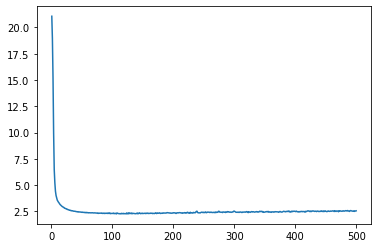

In [47]:
#검증점수  epoch당 
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.show()

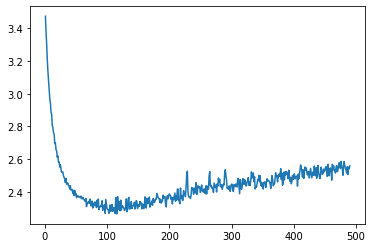

In [48]:
# 처음 10개의 포인터를 제외하고 그려보면
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1), truncated_mae_history)
plt.show()

In [49]:
# 다시 훈련 130
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.4666 - mae: 2.4836


In [50]:
test_mae_score

2.4835970401763916

In [51]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([8.215208], dtype=float32)